#MOVIE RATING PREDICTION WITH PYTHON.


In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [198]:
data=pd.read_csv(r"F:\imdb data\IMDb Movies India.csv",encoding='latin1')
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
data.shape

(15509, 10)

In [200]:
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [201]:
data.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [202]:
data.dropna(inplace=True)  ##droppe the missing value.

In [203]:
data.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [204]:
data.shape

(5659, 10)

In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


In [206]:
data['Year'] = pd.to_numeric(data['Year'].str.extract('(\d+)', expand=False), errors='coerce')  ##we conver year column non numeric to numeric

In [207]:
data['Year'].info()

<class 'pandas.core.series.Series'>
Index: 5659 entries, 1 to 15508
Series name: Year
Non-Null Count  Dtype
--------------  -----
5659 non-null   int64
dtypes: int64(1)
memory usage: 88.4 KB


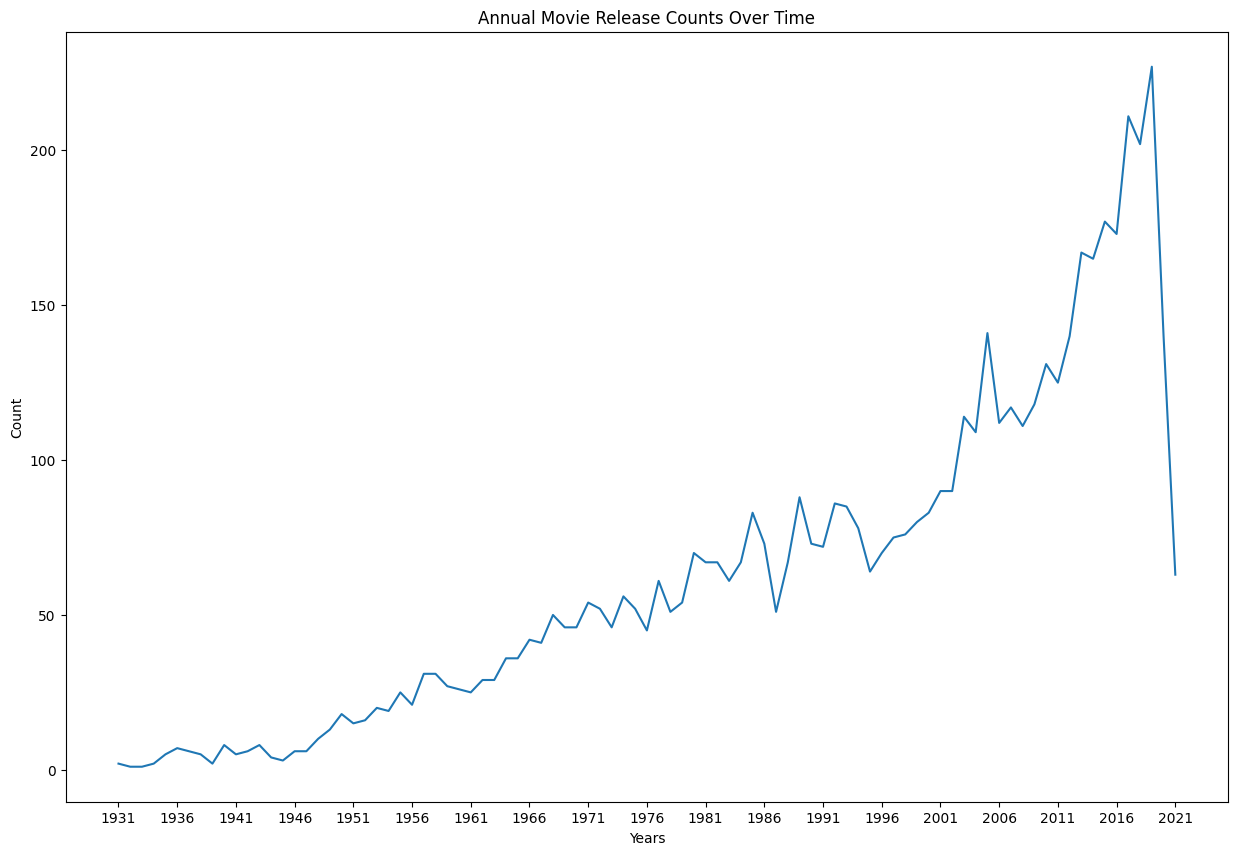

In [208]:
plt.figure(figsize=(15,10))
sns.lineplot(data=data['Year'].value_counts().sort_index())
tick_positions = range(min(data['Year']), max(data['Year']) + 1, 5)
plt.title("Annual Movie Release Counts Over Time")
plt.xticks(tick_positions)
plt.xlabel("Years")
plt.ylabel("Count")
plt.show()

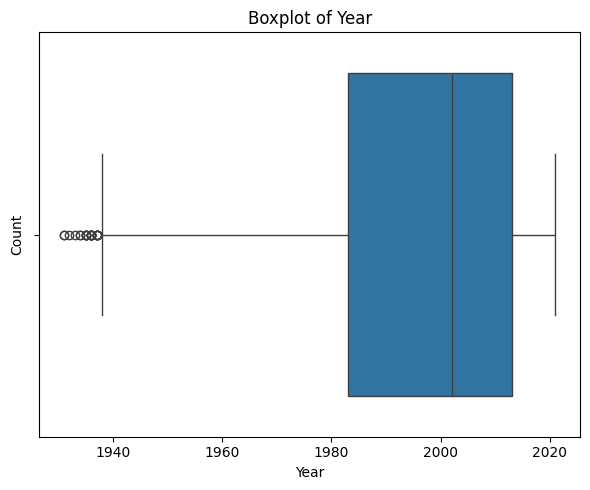

In [209]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='Year', data=data)
plt.title('Boxplot of Year')
plt.xlabel('Year')
plt.ylabel('Count')

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [210]:
data['Year'].median()

2002.0

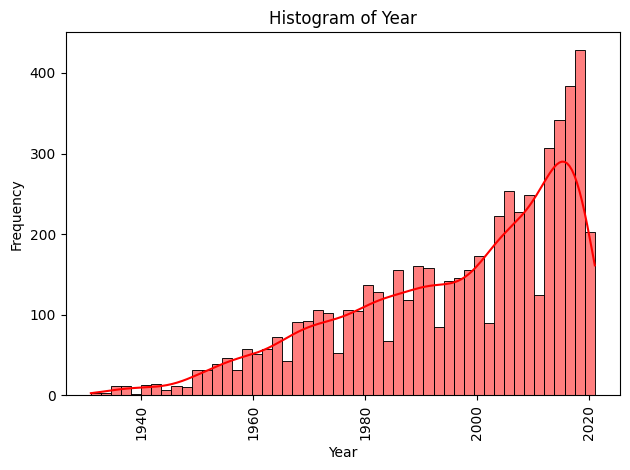

In [211]:
sns.histplot(data['Year'], bins=50, kde=True, color='red')
plt.title('Histogram of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

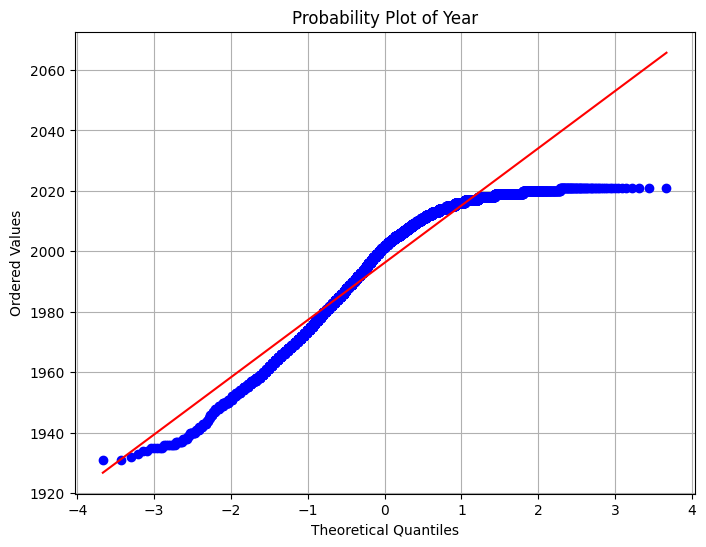

In [212]:
import scipy.stats as stats
plt.figure(figsize=(8, 6))
stats.probplot(data['Year'], plot=plt)
plt.title('Probability Plot of Year')
plt.xlabel('Theoretical Quantiles')   # THAT IS NOT A NORMAL DIUSTRIBUTION
plt.ylabel('Ordered Values')
plt.grid(True)
plt.show()

In [213]:
data['Duration'] = pd.to_numeric(data['Duration'].str.extract('(\d+)', expand=False), errors='coerce')  ##we conver 'Duration'column non numeric to numeric

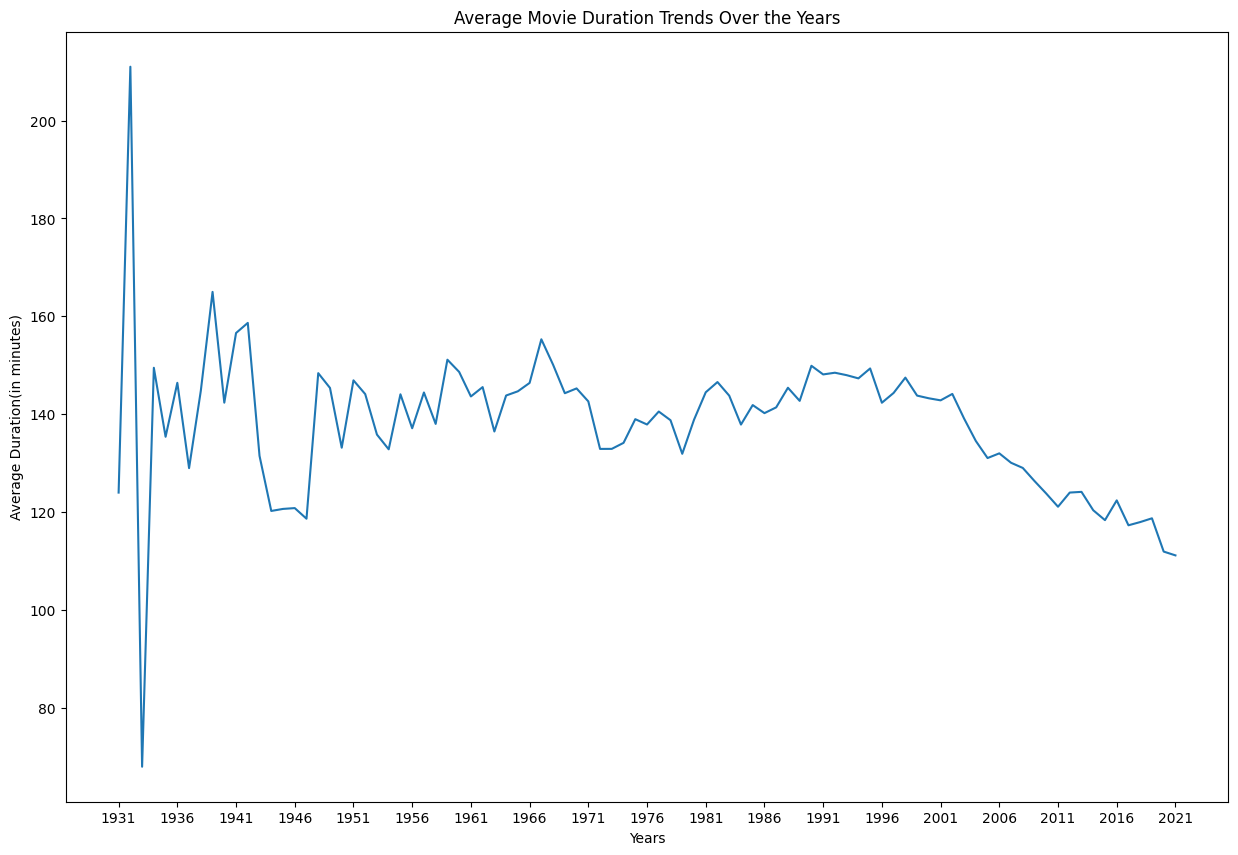

In [214]:
plt.figure(figsize=(15,10))
sns.lineplot(data=data.groupby('Year')['Duration'].mean().reset_index(), x='Year', y='Duration')
tick_positions = range(min(data['Year']), max(data['Year']) + 1, 5)
plt.title("Average Movie Duration Trends Over the Years")
plt.xticks(tick_positions)
plt.xlabel("Years")
plt.ylabel('Average Duration(in minutes)')
plt.show()

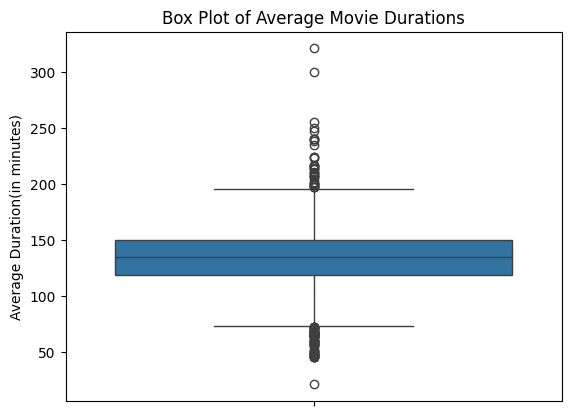

In [258]:
sns.boxplot(data=data, y='Duration')
plt.title("Box Plot of Average Movie Durations")
plt.ylabel('Average Duration(in minutes)')
plt.show()

In [259]:
Q1 = data['Rating'].quantile(0.25)
Q3 = data['Rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(df_copy['Rating'] >= lower_bound) & (data['Rating'] <= upper_bound)]
data.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


<Axes: xlabel='Duration', ylabel='Density'>

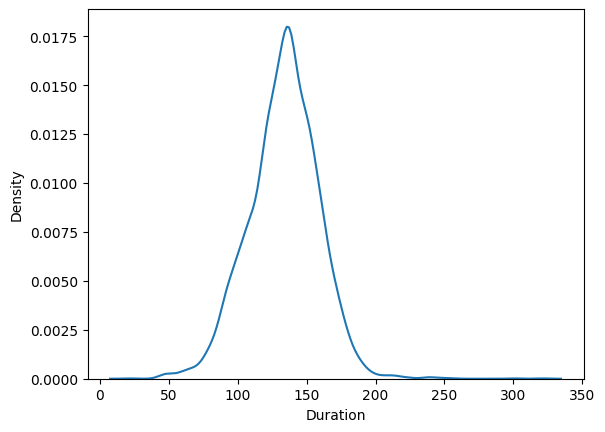

In [260]:
sns.kdeplot(data['Duration'])  # it is normal distributiuon

In [217]:
genre=data['Genre']
genre

1                            Drama
3                  Comedy, Romance
5           Comedy, Drama, Musical
6              Drama, Romance, War
8        Horror, Mystery, Thriller
                   ...            
15493                        Drama
15494    Biography, Drama, History
15503         Action, Crime, Drama
15505                Action, Drama
15508                Action, Drama
Name: Genre, Length: 5659, dtype: object

In [218]:
generes=data['Genre'].str.split(',',expand=True)  #expand genre column 
generes

,0,1,2
1,Drama,None,None
3,Comedy,Romance,None
5,Comedy,Drama,Musical
6,Drama,Romance,War
8,Horror,Mystery,Thriller
...,...,...,...
15493,Drama,None,None
15494,Biography,Drama,History
15503,Action,Crime,Drama
15505,Action,Drama,None


In [219]:
stack_data=generes.stack()
stack_data.dropna()
value_count=stack_data.value_counts()   ##create a data frame with frequency corresponding Genre
print(value_count)

 Drama         1954
Drama          1842
Action         1652
 Romance       1221
Comedy          989
 Crime          604
 Thriller       590
 Family         364
 Comedy         355
 Musical        322
Crime           271
 Mystery        245
 Adventure      172
Romance         159
Horror          128
 Fantasy        115
Adventure       105
 History         91
Musical          90
Thriller         89
Biography        84
 Horror          74
Mystery          59
Family           52
 Music           50
Documentary      48
Animation        40
 Sport           38
 Action          34
 Biography       31
Fantasy          31
 War             30
 Sci-Fi          28
History           8
Sci-Fi            4
War               3
Music             3
Sport             2
 News             1
 Western          1
Name: count, dtype: int64


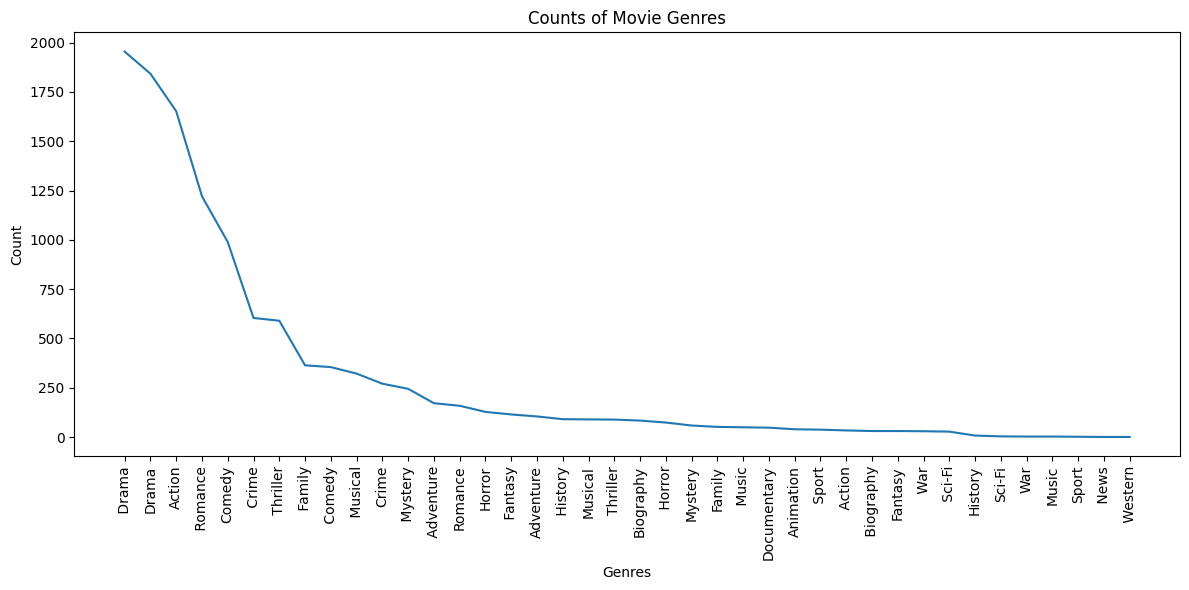

In [220]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=value_count.index, y=value_count.values)
plt.title('Counts of Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [221]:
data['Votes']=data['Votes'].str.replace(',','').astype(int)

In [222]:
data.Votes

1           8
3          35
5         827
6        1086
8         326
         ... 
15493     408
15494    1496
15503      44
15505     655
15508      20
Name: Votes, Length: 5659, dtype: int32

In [223]:
directors=data['Director'].value_counts()
directors

Director
David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         33
Hrishikesh Mukherjee    33
Shakti Samanta          33
                        ..
Sriram Raja              1
Randeep Jha              1
Vicky Bhardwaj           1
Salar Shaikh             1
Mozez Singh              1
Name: count, Length: 2431, dtype: int64

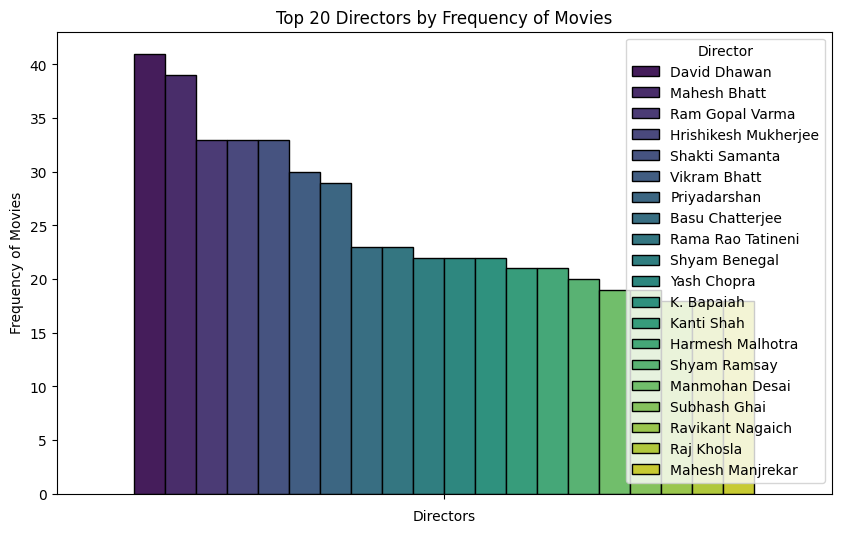

In [224]:
plt.figure(figsize=(10, 6))
sns.barplot(hue=directors.head(20).index, y=directors.head(20).values,ec='black',palette='viridis')
plt.xlabel('Directors')
plt.ylabel('Frequency of Movies')
plt.title('Top 20 Directors by Frequency of Movies')
plt.xticks(rotation=90)
plt.show()

In [225]:
actors=pd.concat([data['Actor 1'],data['Actor 2'],data['Actor 3']]).dropna().value_counts()
actors

Mithun Chakraborty    160
Amitabh Bachchan      148
Dharmendra            146
Ashok Kumar           124
Akshay Kumar          120
                     ... 
Rajeev Dassani          1
Rehaan Engineer         1
Glenn                   1
Pernia Qureshi          1
Shatakshi Gupta         1
Name: count, Length: 5041, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13192\814286132.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=actors.head(20).index, y=actors.head(20).values,ec='black',palette='rainbow')


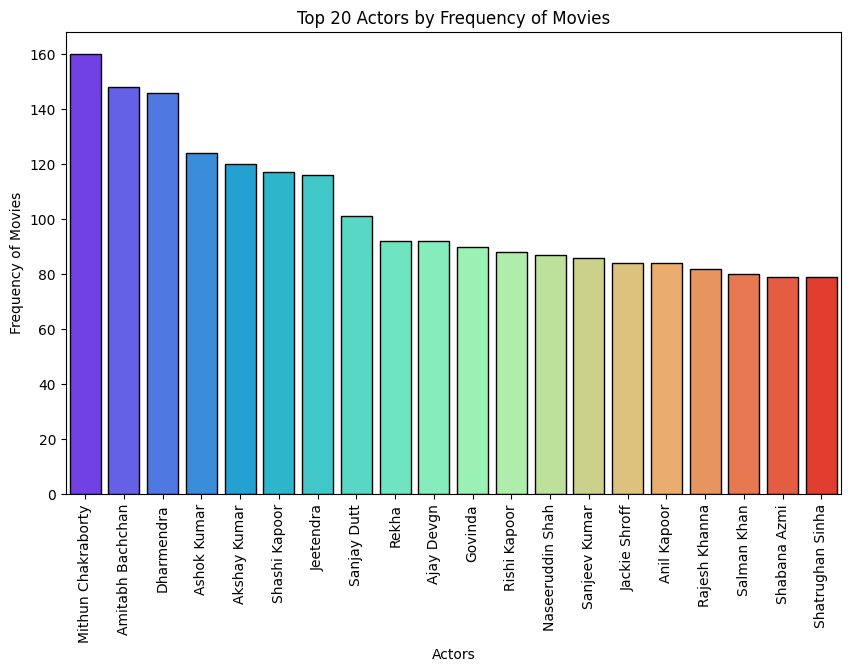

In [226]:
plt.figure(figsize=(10, 6))
sns.barplot(x=actors.head(20).index, y=actors.head(20).values,ec='black',palette='rainbow')
plt.xlabel('Actors')
plt.ylabel('Frequency of Movies')
plt.title('Top 20 Actors by Frequency of Movies')
plt.xticks(rotation=90)
plt.show()

In [234]:
df_copy = data.copy()
df_copy["Actor"] = df_copy['Actor 1'] + ', ' + df_copy['Actor 2'] + ', ' + df_copy['Actor 3']
df_copy["Directors"] = df_copy['Director'].astype('category').cat.codes
df_copy["Genres"] = df_copy['Genre'].astype('category').cat.codes
df_copy["Actors"] = df_copy['Actor'].astype('category').cat.codes
df_copy.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Directors,Genres,Actors
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",629,229,3875
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor",1335,184,3343
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",1530,157,1119
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",2044,289,2086
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",135,320,5562
9,@Andheri,2014,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon,"Augustine, Fathima Babu, Byon",401,37,974
10,1:1.6 An Ode to Lost Love,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni,"Rati Agnihotri, Gulshan Grover, Atul Kulkarni",1083,229,3880
11,1:13:7 Ek Tera Saath,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani,"Pankaj Berry, Anubhav Dhir, Hritu Dudani",266,316,3230
12,100 Days,1991,161,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey,"Jackie Shroff, Madhuri Dixit, Javed Jaffrey",1374,323,1900
13,100% Love,2012,166,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh,"Jeet, Koyel Mallick, Sujoy Ghosh",1506,159,1982


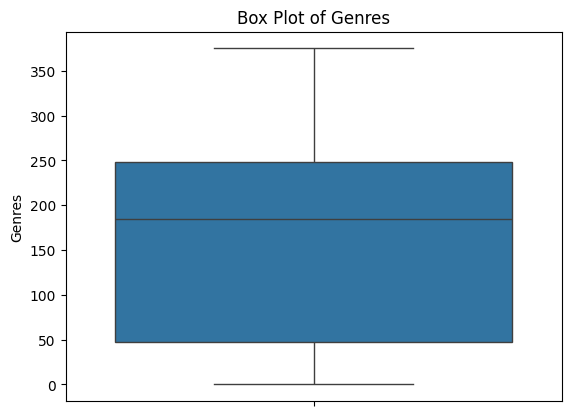

In [235]:
sns.boxplot(data=df_copy, y='Genres')
plt.ylabel('Genres')
plt.title('Box Plot of Genres')
plt.show()

GENERES Is -ve skew distribution.

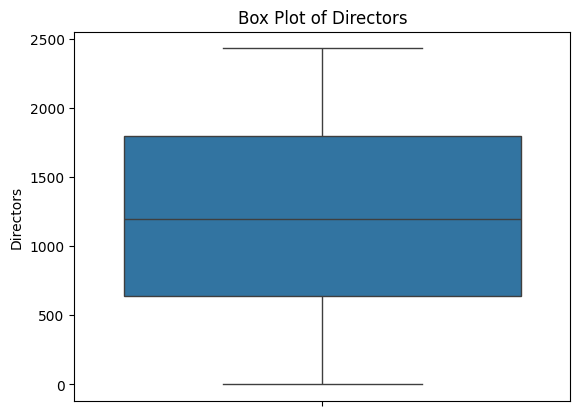

In [236]:
sns.boxplot(data=df_copy, y='Directors')
plt.ylabel('Directors')
plt.title('Box Plot of Directors')
plt.show()

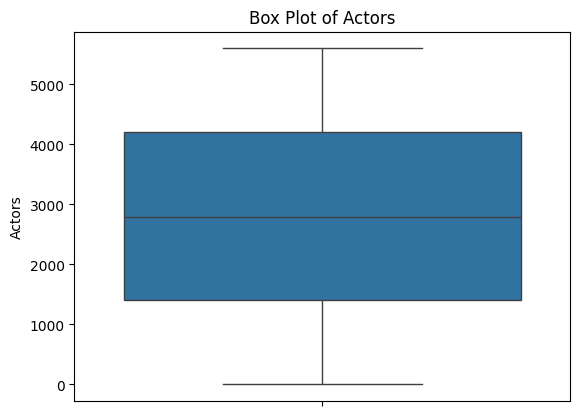

In [237]:
sns.boxplot(data=df_copy, y='Actors')
plt.ylabel('Actors')
plt.title('Box Plot of Actors')
plt.show()

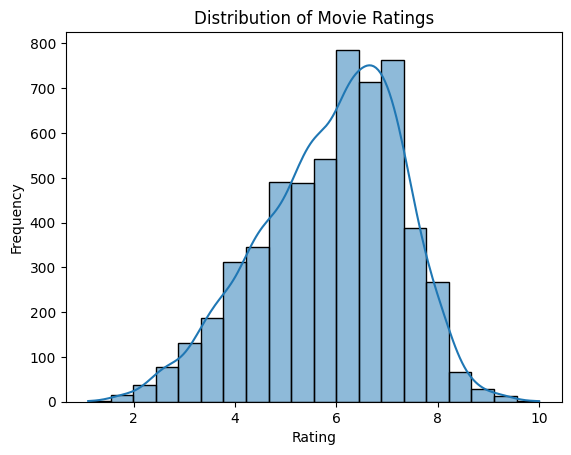

In [240]:
sns.histplot(data = df_copy, x = "Rating", bins = 20, kde = True)
plt.xlabel('Rating')
plt.ylabel('Frequency')   
plt.title('Distribution of Movie Ratings')
plt.show()                                  ##This is the -ve skew distribution

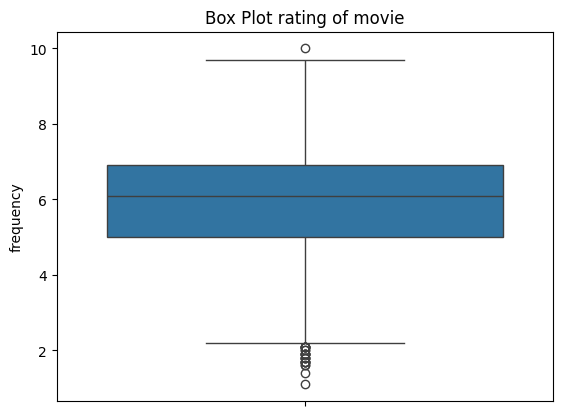

In [241]:
sns.boxplot(data=df_copy, y='Rating')
plt.title("Box Plot rating of movie")
plt.ylabel('frequency')                      
plt.show()             #(Q1-Q2)>(Q2-Q3)

In [243]:
Q1 = df_copy['Rating'].quantile(0.25)
Q3 = df_copy['Rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_copy = df_copy[(df_copy['Rating'] >= lower_bound) & (df_copy['Rating'] <= upper_bound)]
df_copy.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Directors,Genres,Actors
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",629,229,3875
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor",1335,184,3343
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",1530,157,1119
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",2044,289,2086
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",135,320,5562


In [244]:
df_copy['Rating'].info()   ### MAIN CONCERN  FOR FITTING THE DATA

<class 'pandas.core.series.Series'>
Index: 5632 entries, 1 to 15508
Series name: Rating
Non-Null Count  Dtype  
--------------  -----  
5632 non-null   float64
dtypes: float64(1)
memory usage: 88.0 KB


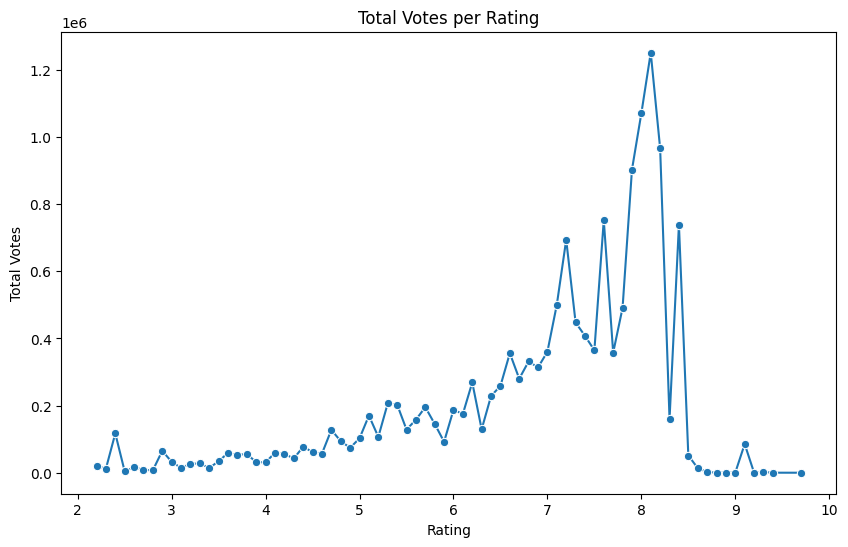

In [245]:
rating_votes = df_copy.groupby('Rating')['Votes'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=rating_votes, x='Rating', y='Votes', marker='o')
plt.xlabel('Rating')
plt.ylabel('Total Votes')
plt.title('Total Votes per Rating')       ##total vote corresponding rating
plt.show()  

In [ ]:
rating_votes

#### FITTING THE DATA SET WITH APPROPRIATE MODEL

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [261]:
x_test=df_copy[['Year','Duration','Votes','Genres']]
y_test=df_copy['Rating']


In [262]:
import statsmodels.api as sm

In [263]:
x1_test=sm.add_constant(x_test)
reg=sm.OLS(y_test,x1_test)
model=reg.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     146.4
Date:                Sun, 24 Mar 2024   Prob (F-statistic):          2.86e-119
Time:                        17:02:23   Log-Likelihood:                -9424.1
No. Observations:                5632   AIC:                         1.886e+04
Df Residuals:                    5627   BIC:                         1.889e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.8087      1.919     20.744      0.0

In [250]:
residual=model.resid
residual

1        1.334487
3       -1.202511
5       -1.065325
6        1.541651
8       -0.445812
           ...   
15493    0.350394
15494    0.518448
15503   -0.005720
15505   -1.122217
15508    0.563430
Length: 5632, dtype: float64

In [251]:
x_train,x_test,y_train,y_test=train_test_split(x_test,y_test,test_size=0.2,random_state=88)


In [252]:
len(x_train),len(x_test),len(y_train),len(y_test)

(4505, 1127, 4505, 1127)

In [253]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [254]:
y_predict=lr.predict(x_test)
y_predict

array([5.36709747, 5.67115359, 6.46055968, ..., 5.93812438, 5.68715228,
       5.65028926])

In [255]:
y_test

13101    5.9
13616    4.1
5021     7.6
4578     4.7
3506     5.7
        ... 
2667     6.5
13189    6.2
959      7.3
14343    5.9
7957     6.1
Name: Rating, Length: 1127, dtype: float64

<Axes: ylabel='Count'>

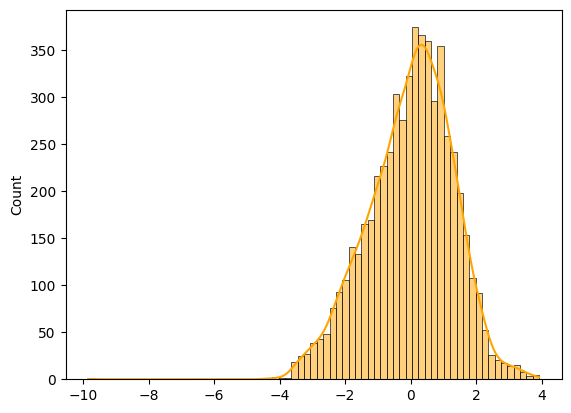

In [256]:
sns.histplot(residual,kde=True,color="orange")